--- Decision Tree Performance ---
Accuracy: 0.967
Precision (macro avg): 0.970
Recall (macro avg): 0.967
F1-score (macro avg): 0.967


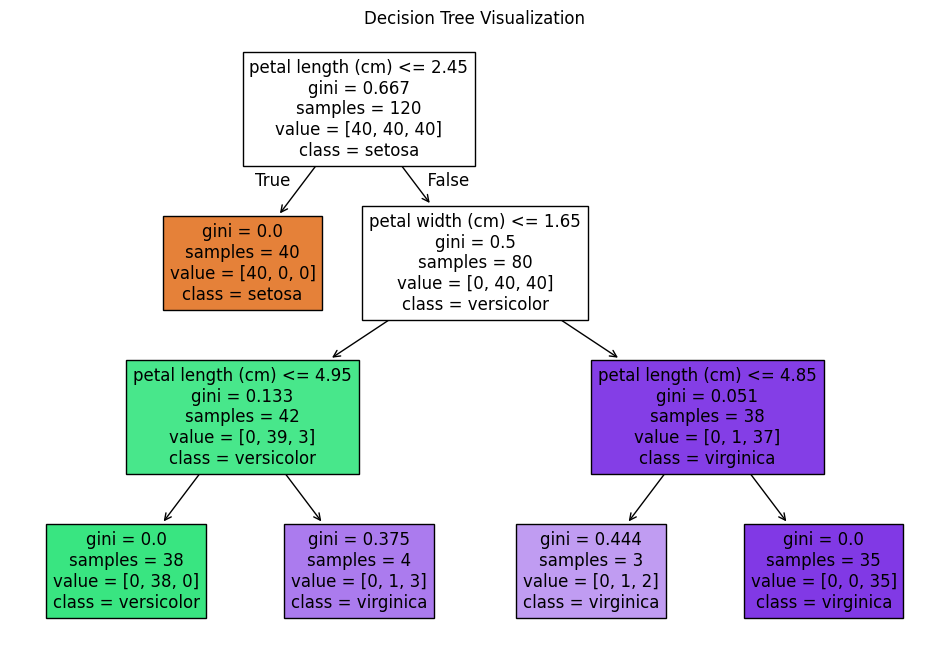


--- KNN (k=5) Performance ---
Accuracy: 1.000
Precision (macro avg): 1.000
Recall (macro avg): 1.000
F1-score (macro avg): 1.000

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


=== KNN Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, classification_report)
from sklearn.model_selection import train_test_split

# Load and preprocess Iris data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split data into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics for Decision Tree
print("--- Decision Tree Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"Precision (macro avg): {precision_score(y_test, y_pred_dt, average='macro'):.3f}")
print(f"Recall (macro avg): {recall_score(y_test, y_pred_dt, average='macro'):.3f}")
print(f"F1-score (macro avg): {f1_score(y_test, y_pred_dt, average='macro'):.3f}")

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, 
          class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Compare with KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Metrics for KNN
print("\n--- KNN (k=5) Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"Precision (macro avg): {precision_score(y_test, y_pred_knn, average='macro'):.3f}")
print(f"Recall (macro avg): {recall_score(y_test, y_pred_knn, average='macro'):.3f}")
print(f"F1-score (macro avg): {f1_score(y_test, y_pred_knn, average='macro'):.3f}")

# Full classification reports
print("\n=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_dt, target_names=class_names))

print("\n=== KNN Classification Report ===")
print(classification_report(y_test, y_pred_knn, target_names=class_names))